In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")
from nltk.stem import WordNetLemmatizer


import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')

import gensim
from gensim.parsing.preprocessing import STOPWORDS
from gensim.parsing.preprocessing import remove_stopwords
all_stopwords = gensim.parsing.preprocessing.STOPWORDS
nltk.download('wordnet')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [2]:
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')

import gensim
from gensim.parsing.preprocessing import STOPWORDS
from gensim.parsing.preprocessing import remove_stopwords
all_stopwords = gensim.parsing.preprocessing.STOPWORDS
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
import os
os.chdir('/content/drive/My Drive/colab_notebook/IDS_575')
!ls

 advance_final_analysis.ipynb	 RestaurantReviewDataYelp.csv
 basic_approach_analysis.ipynb	'yelp reviews.ipynb'
 lexicon_based_approach.ipynb


In [0]:
!pip install afinn
!pip install textblob
!pip install vaderSentiment
from afinn import Afinn

In [0]:
from afinn import Afinn

In [0]:
 yelp = pd.read_csv('RestaurantReviewDataYelp.csv')

In [0]:
yelp.columns

Index(['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text',
       'type', 'useful', 'user_id', 'address', 'attributes[0]',
       'attributes[1]', 'attributes[2]', 'categories[0]', 'categories[1]',
       'categories[2]', 'city', 'is_open', 'latitude', 'longitude', 'name',
       'neighborhood', 'postal_code', 'review_count', 'state'],
      dtype='object')

In [10]:
yelp.shape

(47495, 26)

In [11]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,type,useful,user_id,address,attributes[0],attributes[1],attributes[2],categories[0],categories[1],categories[2],city,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,state
0,4uiijOUDzc-DeIb2XcKW_A,0,9/15/2009,0,#NAME?,3,We came here for dinner to celebrate my friend...,review,2,C0jquh-km5UnawqDqSQpBw,"Treasure Island Hotel and Casino, 3300 S Las V...",Alcohol: full_bar,Ambience: upscale,BusinessAcceptsCreditCards: True,Asian Fusion,Restaurants,NaN,Las Vegas,0,36.128561,-115.17113,Khotan,The Strip,89109,37,NV
1,4uiijOUDzc-DeIb2XcKW_A,2,9/6/2010,1,N42b2u6YSL5iEjN6NnrKeQ,4,My boyfriend and I decided to go resturant hun...,review,2,GDeoUHALgyqK13ewN92Jnw,"Treasure Island Hotel and Casino, 3300 S Las V...",Alcohol: full_bar,Ambience: upscale,BusinessAcceptsCreditCards: True,Asian Fusion,Restaurants,NaN,Las Vegas,0,36.128561,-115.17113,Khotan,The Strip,89109,37,NV
2,4uiijOUDzc-DeIb2XcKW_A,1,7/28/2010,0,3r40NTxUZyjPI26ftFaHaw,4,***for lounge only****nnMaybe I like this plac...,review,0,d1sLYlfSzHo6WCpfe-j7zg,"Treasure Island Hotel and Casino, 3300 S Las V...",Alcohol: full_bar,Ambience: upscale,BusinessAcceptsCreditCards: True,Asian Fusion,Restaurants,NaN,Las Vegas,0,36.128561,-115.17113,Khotan,The Strip,89109,37,NV
3,4uiijOUDzc-DeIb2XcKW_A,0,2/13/2015,0,XQaK1CiSsJdsxJP5uhRccg,1,"A Superficial place in Treasure Island, trying...",review,0,AbC6lu_5RrMgslQeocvzRg,"Treasure Island Hotel and Casino, 3300 S Las V...",Alcohol: full_bar,Ambience: upscale,BusinessAcceptsCreditCards: True,Asian Fusion,Restaurants,NaN,Las Vegas,0,36.128561,-115.17113,Khotan,The Strip,89109,37,NV
4,4uiijOUDzc-DeIb2XcKW_A,1,2/2/2010,0,Ulb1lFkd2EjXiXk_8lIsDQ,2,We stumbled upon khotan by pure laziness...We ...,review,1,wDdh7cLIFK08KtJhj5q9uA,"Treasure Island Hotel and Casino, 3300 S Las V...",Alcohol: full_bar,Ambience: upscale,BusinessAcceptsCreditCards: True,Asian Fusion,Restaurants,NaN,Las Vegas,0,36.128561,-115.17113,Khotan,The Strip,89109,37,NV


In [0]:
#cleaning text function.................................
all_stopwords = gensim.parsing.preprocessing.STOPWORDS #stop word list from genism.....It is better than NLTK.
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem #snowball word rooter......
lemmatizer = WordNetLemmatizer()
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@#'

# cleaning master function
def clean_ninja(text, bigrams=False):
    text = text.lower() # lower case
    text = re.sub('['+my_punctuation + ']+', ' ', text) # strip punctuation
    text = re.sub('\s+', ' ', text) #remove double spacing
    text = re.sub('([0-9]+)', '', text) # remove numbers
    text_token_list = [word for word in text.split(' ')
                       if word not in all_stopwords] # remove stopwords

    text_token_list = [word_rooter(word) if '#' not in word else word
                        for word in text_token_list] # apply word rooter
    
    text_token_list = [lemmatizer.lemmatize(word) if '#' not in word else word
                        for word in text_token_list] # apply lemmatizing
                    
    
    text = ' '.join(text_token_list)
    return text  

In [0]:
yelp['cleaned_text']=yelp['text'].apply(clean_text)

we do not have the convenience of a well-labeled training dataset in start. Hence, we will need to use unsupervised techniques for predicting the sentiment by using knowledgebases, ontologies, databases, and lexicons that have detailed information, specially curated and prepared just for sentiment analysis. A lexicon is a dictionary, vocabulary, or a book of words. In our case, lexicons are special dictionaries or vocabularies that have been created for analyzing sentiments. Most of these lexicons have a list of positive and negative polar words with some score associated with them, and using various techniques like the position of words, surrounding words, context, parts of speech, phrases, and so on, scores are assigned to the text documents for which we want to compute the sentiment. After aggregating these scores, we get the final sentiment.

In [0]:
corpus = list(yelp['cleaned_text'])

In [0]:
#calculate sentiment scores from predefined dictionaries.........
from afinn import Afinn
af = Afinn()

# compute sentiment scores (polarity) and labels
sentiment_score = [af.score(doc) for doc in corpus]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]

In [0]:
sentiment_scores[500]

2.0

In [0]:
sentiment_category[500]

'positive'

In [0]:
#creating data frame of these results and checking correlation with ratings....
result = pd.DataFrame([list(yelp['stars']), sentiment_scores, sentiment_category]).T
result.columns = ['star_rating', 'sentiment_score', 'sentiment_category']
result['sentiment_score'] = result.sentiment_score.astype('float')
result.groupby(by=['star_rating']).describe()

sentiment_score                                                
                      count      mean       std   min  25%  50%   75%   max
star_rating                                                                
1                    5224.0  1.047090  6.375817 -57.0 -2.0  1.0   4.0  49.0
2                    4757.0  5.256464  7.898525 -48.0  1.0  4.0   9.0  77.0
3                    7381.0  8.120444  8.822028 -79.0  3.0  7.0  12.0  82.0
4                   14042.0  9.576058  9.014218 -76.0  4.0  8.0  14.0  85.0
5                   16091.0  8.694053  8.281262 -49.0  3.0  7.0  12.0  94.0

In [0]:
result.dtypes

star_rating            object
sentiment_score       float64
sentiment_category     object
dtype: object

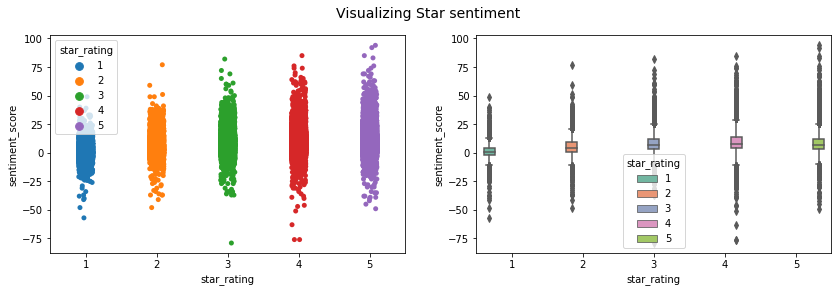

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sb.stripplot(x='star_rating', y="sentiment_score", 
                   hue='star_rating', data=result, ax=ax1)
bp = sb.boxplot(x='star_rating', y="sentiment_score", 
                 hue='star_rating', data=result, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing Star sentiment', fontsize=14)

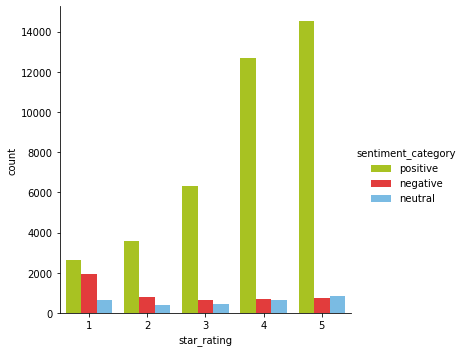

In [0]:
fc = sb.factorplot(x="star_rating", hue="sentiment_category", 
                    data=result, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

Using Text Blob..................
 
TextBlob is another excellent open-source library for performing NLP tasks with ease, including sentiment analysis. It also an a sentiment lexicon (in the form of an XML file) which it leverages to give both polarity and subjectivity scores. Typically, the scores have a normalized scale as compare to Afinn. The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective. Let’s use this now to get the sentiment polarity and labels for each review and aggregate the summary statistics per star category

In [0]:
from textblob import TextBlob

# compute sentiment scores (polarity) and labels
sentiment_scores_tb = [round(TextBlob(doc).sentiment.polarity, 3) for doc in yelp['cleaned_text']]
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]


# sentiment statistics per news category
#creating data frame of these results and checking correlation with ratings....
result_tb = pd.DataFrame([list(yelp['stars']), sentiment_scores_tb, sentiment_category_tb]).T
result_tb.columns = ['star_rating', 'sentiment_scores_tb', 'sentiment_category_tb']
result_tb['sentiment_scores_tb'] = result_tb.sentiment_scores_tb.astype('float')
result_tb.groupby(by=['star_rating']).describe()

sentiment_scores_tb                      ...                   
                          count      mean       std  ...    50%    75%  max
star_rating                                          ...                   
1                        5224.0  0.001865  0.281265  ...  0.000  0.163  1.0
2                        4757.0  0.153148  0.234843  ...  0.153  0.292  1.0
3                        7381.0  0.236485  0.213994  ...  0.233  0.367  1.0
4                       14042.0  0.301365  0.222993  ...  0.300  0.438  1.0
5                       16091.0  0.349529  0.251171  ...  0.344  0.500  1.0

[5 rows x 8 columns]

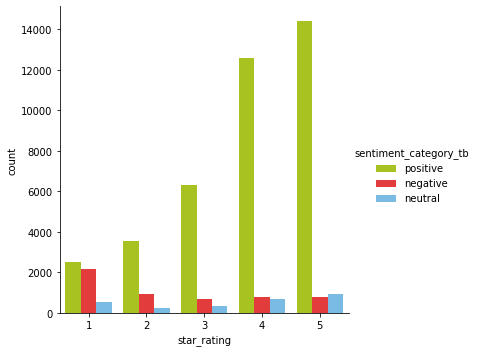

In [0]:
fc = sb.factorplot(x="star_rating", hue="sentiment_category_tb", 
                    data=result_tb, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

VADER has a lot of advantages over traditional methods of Sentiment Analysis, including:
It works exceedingly well on social media type text, yet readily generalizes to multiple domains
It doesn’t require any training data but is constructed from a generalizable, valence-based, human-curated gold standard sentiment lexicon
It is fast enough to be used online with streaming data, and
It does not severely suffer from a speed-performance tradeoff.

In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

# compute sentiment scores (polarity) and labels
sentiment_scores_vad = [analyser.polarity_scores(doc) for doc in corpus]


In [0]:
result_vad = pd.DataFrame(sentiment_scores_vad)

In [0]:
result_vad.compound.describe()

count    47495.000000
mean         0.630941
std          0.475781
min         -0.998800
25%          0.526700
50%          0.847300
75%          0.941300
max          0.999100
Name: compound, dtype: float64

In [0]:
#storing compound values to a list......
compound_score= list(result_vad['compound'])                        
sentiment_category_vad = ['positive' if score > 0.05 
                             else 'negative' if score < -.05 
                                 else 'neutral' 
                                     for score in compound_score]

In [0]:
# sentiment statistics per rating
#creating data frame of these results and checking correlation with ratings....
result_vad_final = pd.DataFrame([list(yelp['stars']), sentiment_category_vad, list(result_vad['compound'])]).T
result_vad_final.columns = ['star_rating','sentiment_category_vad','compound_Score']
result_vad_final['compound_Score'] = result_vad_final.compound_Score.astype('float')
result_vad_final.groupby(by=['star_rating']).describe()

compound_Score                      ...                        
                     count      mean       std  ...     50%     75%     max
star_rating                                     ...                        
1                   5224.0  0.124159  0.614275  ...  0.1779  0.7003  0.9965
2                   4757.0  0.493454  0.530871  ...  0.7184  0.9062  0.9983
3                   7381.0  0.658591  0.442455  ...  0.8519  0.9432  0.9985
4                  14042.0  0.735753  0.378885  ...  0.8860  0.9545  0.9984
5                  16091.0  0.731965  0.371766  ...  0.8750  0.9485  0.9991

[5 rows x 8 columns]

In [0]:
# sentiment statistics per news category
#creating data frame of these results and checking correlation with ratings....
result_tb = pd.DataFrame([list(yelp['stars']), sentiment_scores_tb, sentiment_category_tb]).T
result_tb.columns = ['star_rating', 'sentiment_scores_tb', 'sentiment_category_tb']
result_tb['sentiment_scores_tb'] = result_tb.sentiment_scores_tb.astype('float')
result_tb.groupby(by=['star_rating']).describe()

In [0]:
result_vad_final.head()

,star_rating,sentiment_category_vad
0,3,positive
1,4,positive
2,4,positive
3,1,negative
4,2,positive


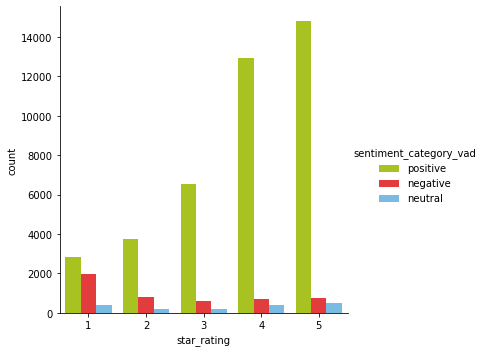

In [0]:
fc = sb.factorplot(x="star_rating", hue="sentiment_category_vad", 
                    data=result_vad_final, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [0]:
result_vad_final['sentiment_category_vad'].value_counts()

positive    40908
negative     4880
neutral      1707
Name: sentiment_category_vad, dtype: int64

In [0]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(sentiment_category_tb, sentiment_category_vad)
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(conf_mat, annot=True, fmt='d', xticklabels=['positive','negative','neutral'], yticklabels=['positive','negative','neutral']
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

SyntaxError: ignored

In [0]:
confusion_matrix = pd.crosstab(result_tb['sentiment_category_tb'], result_vad_final['sentiment_category_vad'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted  negative  neutral  positive
Actual                                
negative       2379      377      2599
neutral        1038      849       862
positive       1463      481     37447
